This script adds one trotter step

In [1]:
import numpy as np
from qiskit import IBMQ, assemble
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.jobstatus import JobStatus

#provider = IBMQ.load_account()
#backend = provider.backend.ibmq_qasm_simulator

In [2]:
import matplotlib.pyplot as plt
from qiskit import IBMQ, assemble
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.providers.jobstatus import JobStatus
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.circuit.library import XXPlusYYGate

In [3]:
### parameterisation
from scipy.constants import h 
hbar = h/2*np.pi
U = 2
J = 1
dtau = -0.3*hbar/J

K_angle = dtau*J/hbar
c_phase_angle = -dtau*U/hbar
n = 16
circuit = QuantumCircuit(n,n)

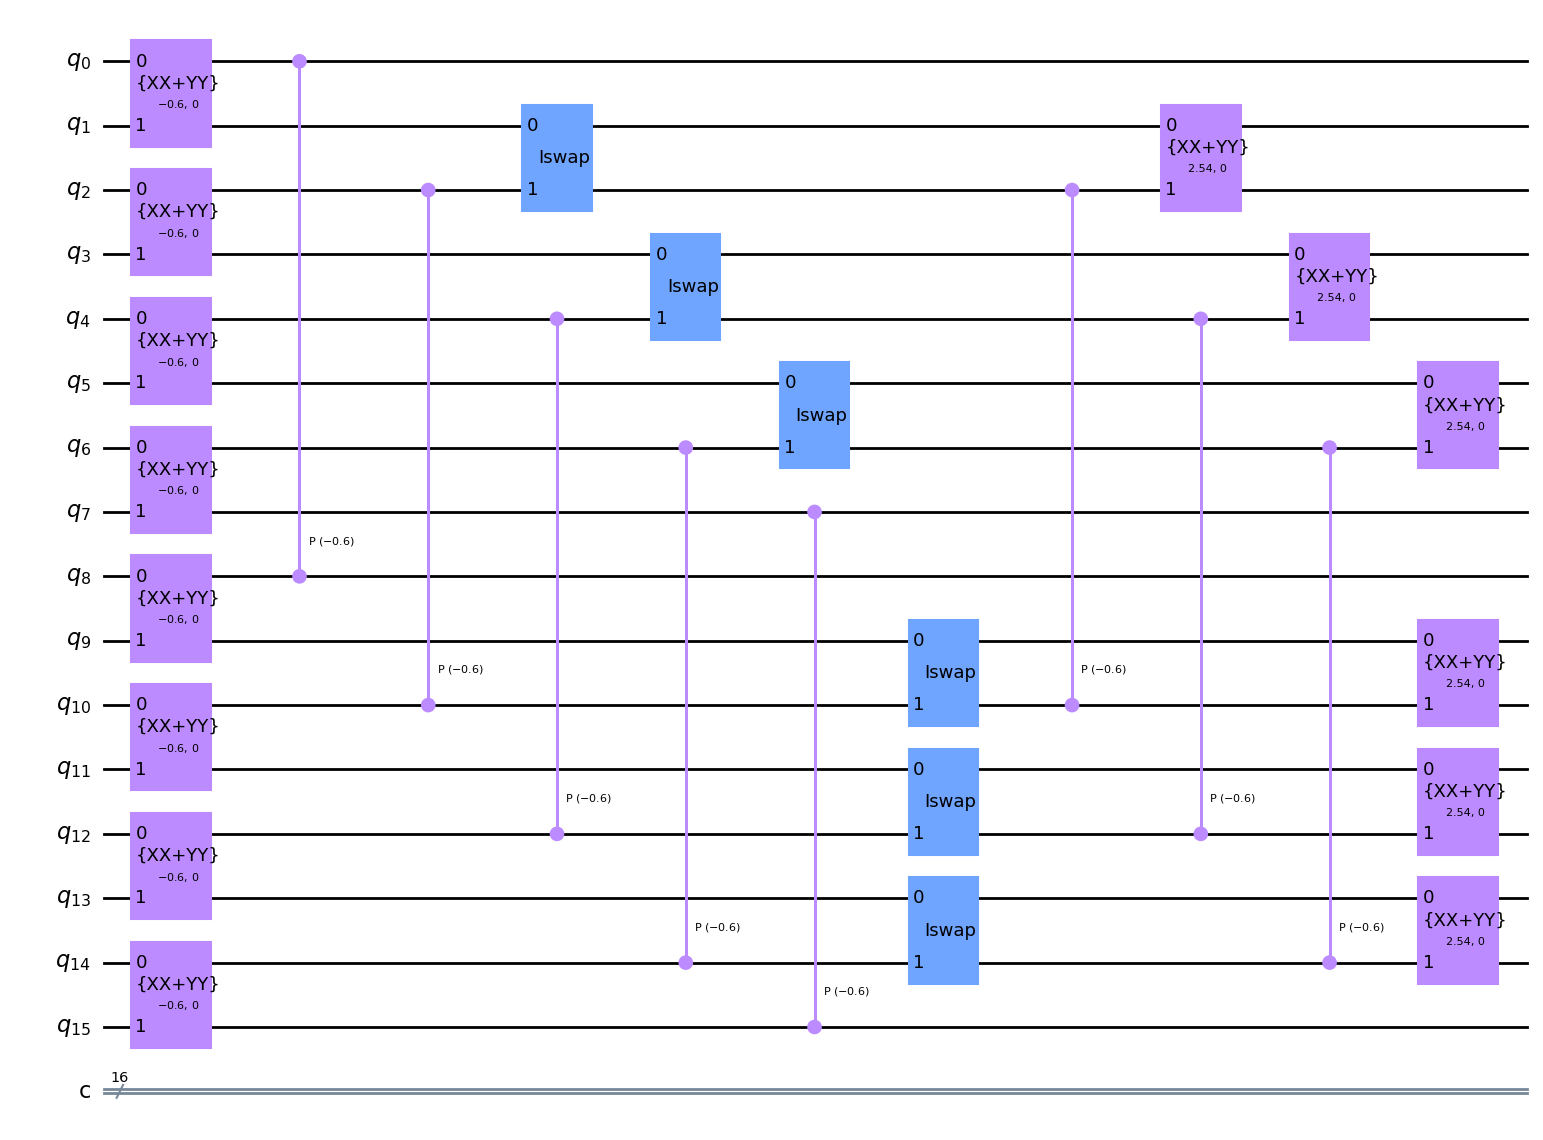

In [4]:
def trotterstep():
    sqrt2 = np.sqrt(2)
    SqrtISWAP = Operator( [
        [1, 0, 0, 0],
        [0, 1/sqrt2, 1j/sqrt2, 0],
        [0, 1j/sqrt2, 1/sqrt2, 0],
        [0, 0, 0, 1] ])
    def addKGate(a,b,theta): 
        XXYYGate = XXPlusYYGate(2*theta,0) 
        circuit.append(XXYYGate, [a,b])
    def addCPHASE(a,b,theta): 
        circuit.cp(-theta,a,b)
        
    def addiSwap(a,b): 
        circuit.iswap(a,b) 
    
    # J odd 
    i=0 
    while i<n-1: 
        addKGate(i, i+1, K_angle) 
        i+=2 
        
    # U odd 
    i=0 
    while i<7: 
        addCPHASE(i, int(i + n/2),c_phase_angle)
        i+=2 
        
    # iSwap 
    i=1 
    while i<7: 
        addiSwap(i, i+1)
        i+=2 
    i=9 
    while i<14: 
        addiSwap(i, i+1) 
        i+=2 
    #U even
    i=2 
    while i<7: 
        addCPHASE(i, int(i + n/2), c_phase_angle) 
        i+=2 
    addCPHASE(7, 15, c_phase_angle) 
    # J even iSwap adjoint 
    i=1 
    while i<7: 
        addKGate(i, i+1,K_angle + (np.pi/2)) 
        i+=2 
    
    i=9 
    while i<14: 
        addKGate(i, i+1,K_angle + (np.pi/2)) 
        i+=2

trotterstep()
#print(K_angle)
#print(c_phase_angle)
circuit.draw('mpl')